In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [10]:
font = {'size': 12}
matplotlib.rc('font', **font)


def plot_series(X, title='Time Series Plot', y_label='Value of X', figsize=(16, 6)):
    """Plots the time series data X.

    Args: 
        X (np.array): Time series data
        title (str): Title for the figure
        y_label (str): y-label for the figure
        figsize (tuple): Size of figure
    """

    fig = plt.figure(figsize=figsize)
    if type(X) is np.array:
        fig.plot(X, linewidth=3)
    else:
        X.plot(linewidth=3)
        
    plt.title(title,fontsize=15)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel(y_label,fontsize=15)
    plt.legend([y_label])
    plt.grid()
    plt.show()

In [11]:
df_fb = pd.read_csv("https://storage.googleapis.com/codehub-data/1-lv2-11-1-daily-total-female-births-CA.csv")
df_fb.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [12]:
df_fb.set_index('date',inplace=True)

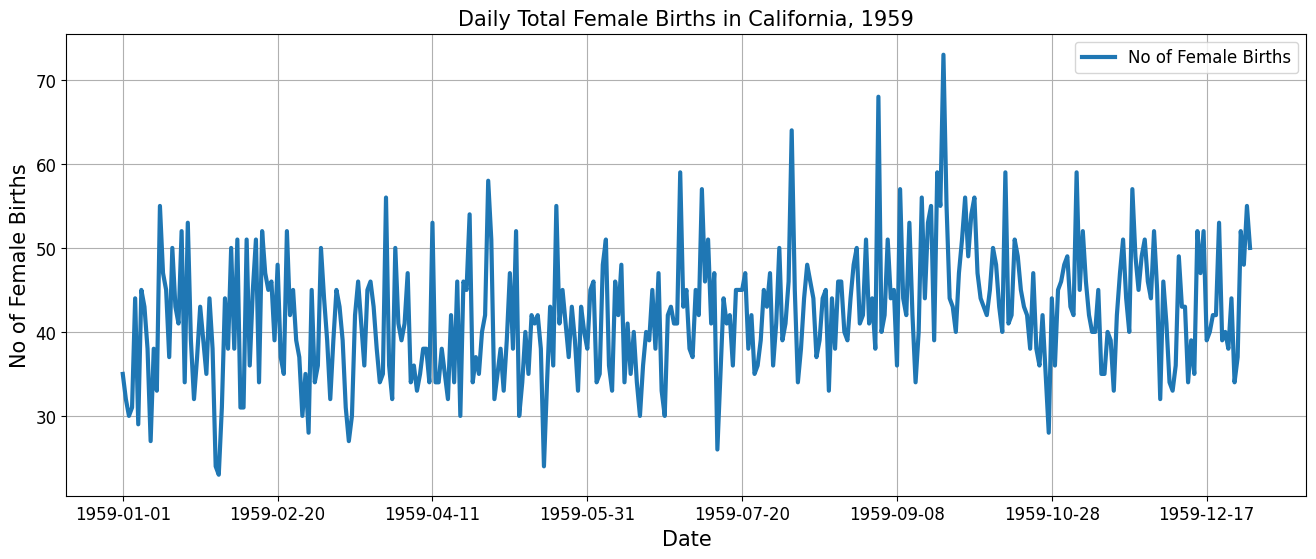

In [13]:
plot_series(df_fb['births'],
            title='Daily Total Female Births in California, 1959',
            y_label="No of Female Births")

In [14]:
# Google Stock

df_gs = pd.read_csv("https://storage.googleapis.com/codehub-data/1-lv2-11-1-GOOG.csv")
df_gs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [20]:
df_gs.set_index('Date',inplace=True)
df_gs.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


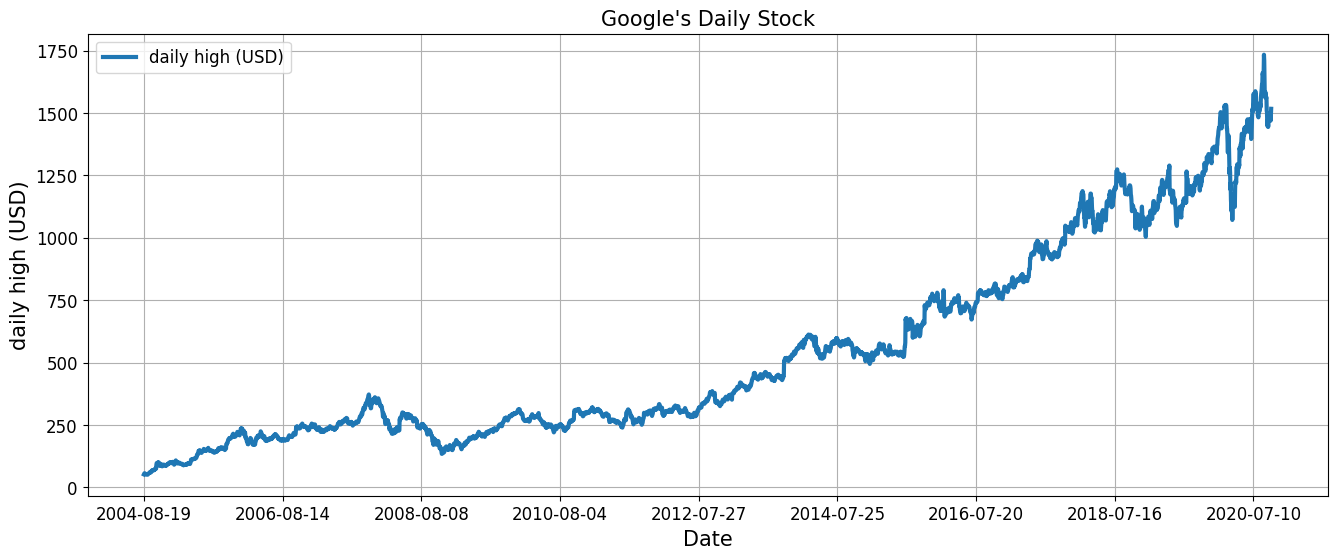

In [21]:
plot_series(
    df_gs['High'],
    title="Google's Daily Stock",
    y_label='daily high (USD)'
)

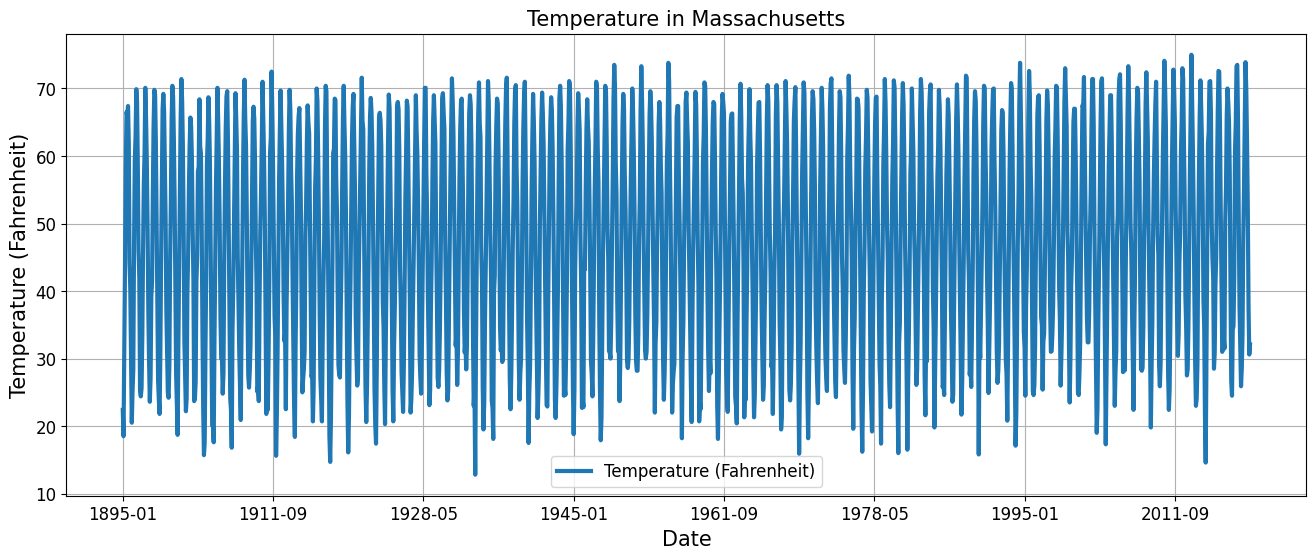

In [25]:
df_td = pd.read_csv("https://storage.googleapis.com/codehub-data/1-lv2-11-1-Temperature.csv")
df_td.set_index('Date', inplace=True)

plot_series(
    df_td['Value'], 
    title='Temperature in Massachusetts',
    y_label='Temperature (Fahrenheit)'
)

In [27]:
def plot_monthwise(pivot,title,ylabel):
    pivot.plot(figsize=(6,6),fontsize=13)
    plt.title(title,fontsize=16)
    plt.ylabel(ylabel,fontsize=14)
    plt.xlabel('Months',fontsize=14)
    plt.xticks(range(1,13))
    plt.legend().remove()
    plt.plot()

In [29]:
pd.DatetimeIndex(df_td.index)

DatetimeIndex(['1895-01-01', '1895-02-01', '1895-03-01', '1895-04-01',
               '1895-05-01', '1895-06-01', '1895-07-01', '1895-08-01',
               '1895-09-01', '1895-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Date', length=1501, freq=None)

In [30]:
df_td.head()

,Value,Anomaly
Date,,
1895-01,22.4,-1.7
1895-02,18.5,-6.5
1895-03,30.8,-3.4
1895-04,43.7,-1.0
1895-05,57.7,2.0


In [32]:
index = pd.DatetimeIndex(df_td.index)
pivot = pd.pivot_table(df_td,values='Value',index=index.month,columns=index.year)
pivot.head()

Date,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Date,,,,,,,,,,,,,,,,,,,,,
1,22.4,20.5,24.4,23.6,23.9,24.9,23.1,22.2,24.1,15.7,...,22.4,30.4,27.5,23.0,21.8,28.5,31.5,24.5,25.9,32.1
2,18.5,25.1,25.6,27.1,21.8,24.2,18.7,24.1,26.6,17.5,...,25.5,33.6,28.4,24.1,14.6,30.9,33.0,34.3,28.5,NaN
3,30.8,28.4,33.3,39.1,30.5,29.1,32.2,39.7,41.3,30.8,...,35.4,44.1,34.9,29.1,29.3,41.0,31.5,34.8,33.7,NaN
4,43.7,46.5,46.0,41.5,44.6,44.3,43.5,45.6,45.1,42.1,...,47.7,48.7,46.3,45.9,45.5,45.0,50.2,42.3,47.8,NaN
5,57.7,59.3,55.8,54.4,56.0,53.4,54.0,55.1,57.7,58.9,...,58.5,60.4,57.7,57.2,61.8,57.2,55.2,60.8,55.4,NaN


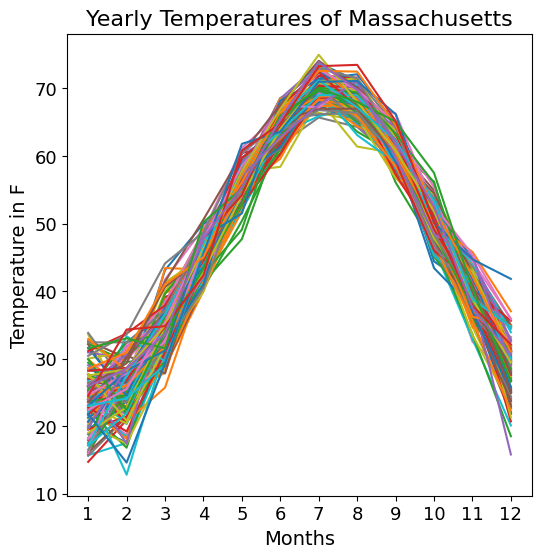

In [33]:
plot_monthwise(pivot,
               title='Yearly Temperatures of Massachusetts',
               ylabel='Temperature in F')

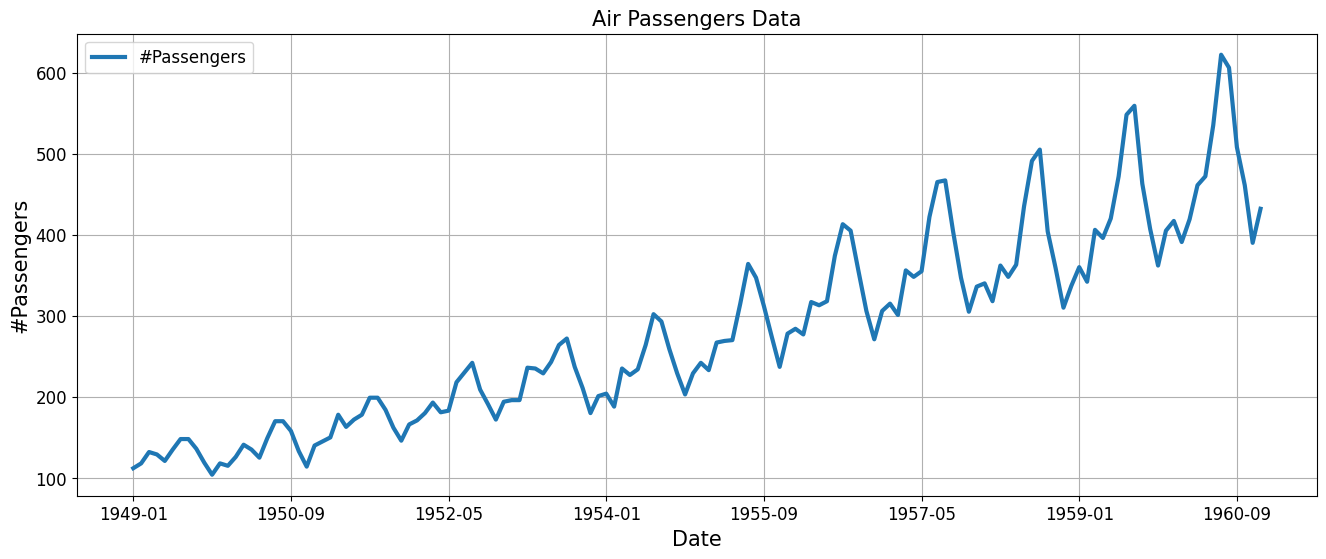

In [35]:
df_ap = pd.read_csv("https://storage.googleapis.com/codehub-data/1-lv2-11-1-AirPassengers.csv")
df_ap.set_index('Month', inplace=True)

plot_series(
    df_ap['#Passengers'], 
    title='Air Passengers Data',
    y_label='#Passengers'
)

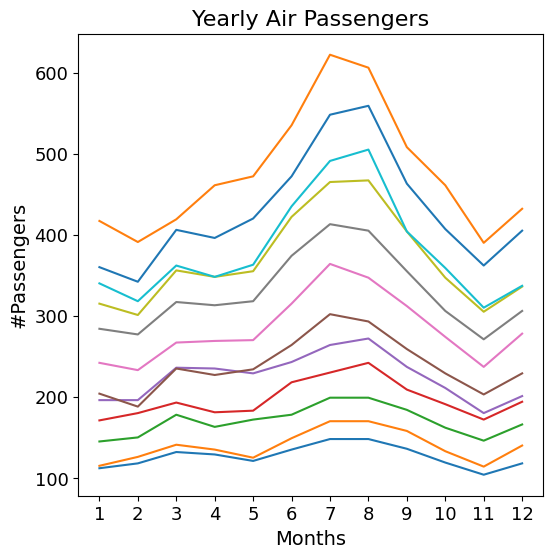

In [36]:
index = pd.DatetimeIndex(df_ap.index) 
pivot = pd.pivot_table(df_ap, values='#Passengers', index=index.month, columns=index.year)

plot_monthwise(pivot, title='Yearly Air Passengers', 
               ylabel='#Passengers')

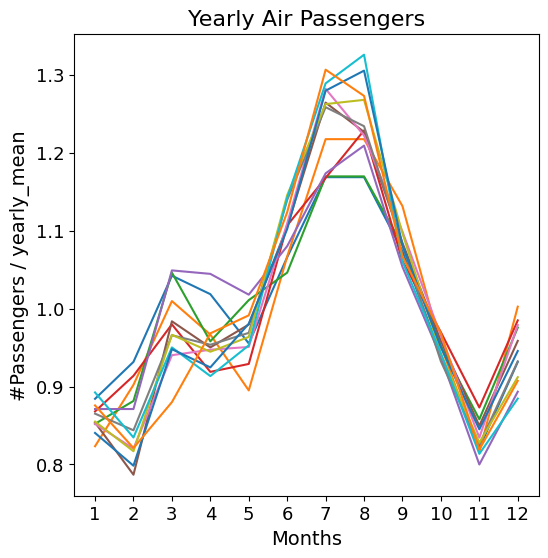

In [39]:
pivot_normalized = pivot / pivot.mean()

plot_monthwise(pivot_normalized, title='Yearly Air Passengers', 
               ylabel='#Passengers / yearly_mean')